# 1. <a id='Introduction'>Introduction 🃏 </a>

### Let's explore a dataset holding many features about cars where we will try to extract some insights from the data. The basic exploration in addition to providing insights such as the most popular car company, prices medium, best mpg etc allows us to know the features that have the highest price correlations. Once the features with the highest correlations with the car prices have been established we will use a machine learning algorithm to try to predict the prices based on these features

# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
!pip install chart_studio
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import plotly.express as px
from plotly.offline import iplot

import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
%matplotlib inline

warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from colorama import Fore, Back, Style 

# Import encoder library
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 

# Imoport tensorflow libraries
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam

/kaggle/input/car-price/CarPrice_Assignment.csv
     |████████████████████████████████| 64 kB 520 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# 3. <a id='reading'>Reading the dataset.csv 📚</a>

In [2]:
cars = pd.read_csv('../input/car-price/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print(Fore.BLUE + 'Data information ....................',Style.RESET_ALL)
print(cars.info())

Data information .................... 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engin

In [4]:
 cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### We don't have any missing value.

In [5]:
# Selecting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Fixing some companies name wrong data
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# 4. <a id='basic'>Basic Data Exploration 🏕️</a> 

### Let's begin our exploration plotting distribution graphs from features car price and horsepower like exemples

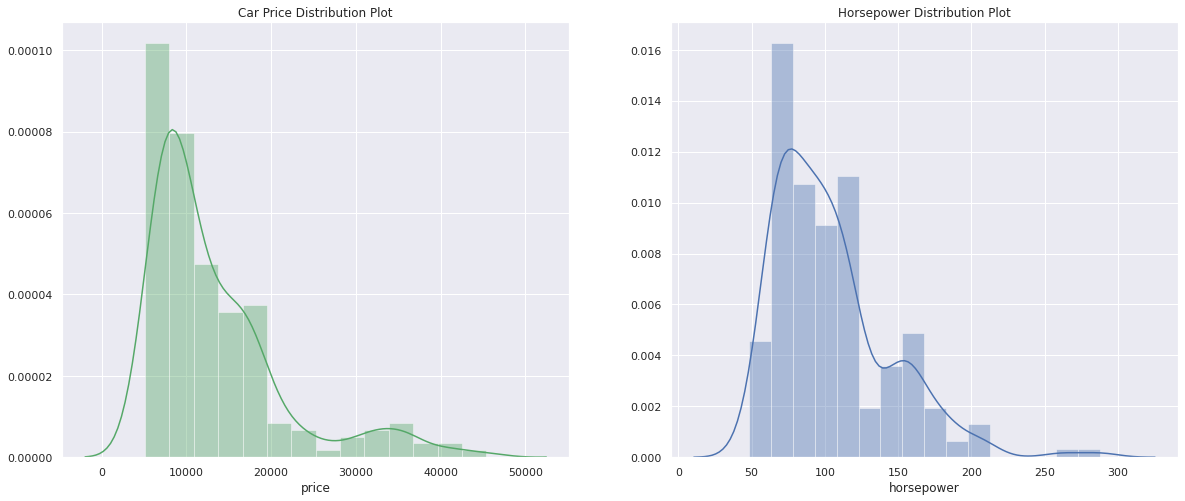

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price, color="g")

plt.subplot(1,2,2)
plt.title('Horsepower Distribution Plot')
sns.distplot(cars.horsepower,color="b" )

plt.show()

In [8]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### We can infer mean car price is around 13276 while median is 10295 and 90% of prices are under 22563.

In [9]:
print(cars.horsepower.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
85%      152.000000
90%      160.000000
100%     288.000000
max      288.000000
Name: horsepower, dtype: float64


### We can infer that mean car horsepower is around 104 hp while median is 95 hp, these results being very close. We see to 90% car horsepower is under 160 hp.

## 4.1. <a id='basic'>Numerical Data </a> 

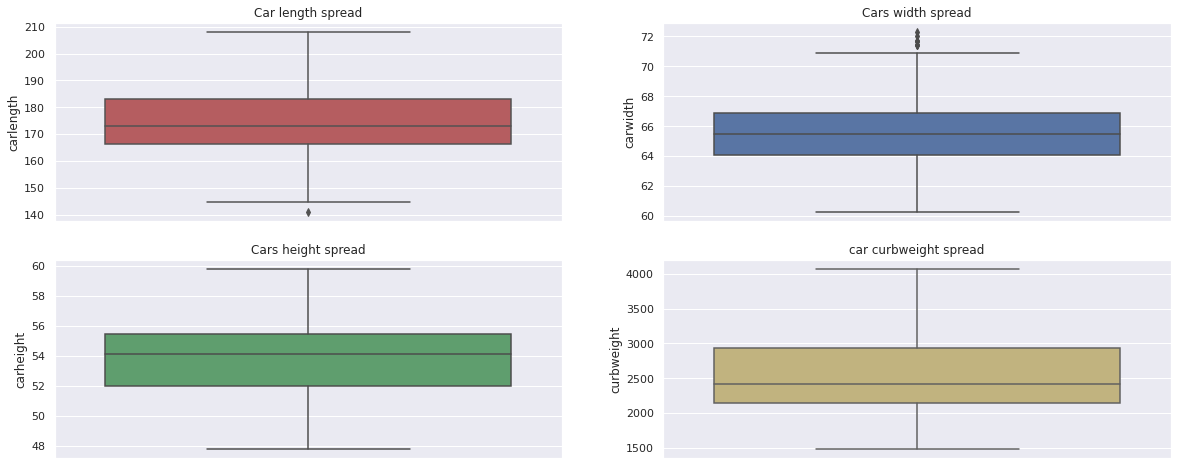

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Car length spread')
sns.boxplot(y=cars.carlength, color = "r")

plt.subplot(2,2,2)
plt.title('Cars width spread')
sns.boxplot(y=cars.carwidth)

plt.subplot(2,2,3)
plt.title('Cars height spread')
sns.boxplot(y=cars.carheight, color = "g")

plt.subplot(2,2,4)
plt.title('car curbweight spread')
sns.boxplot(y=cars.curbweight, color = "y")


plt.show()

### The carwidth is unique from four that show signicant outliers

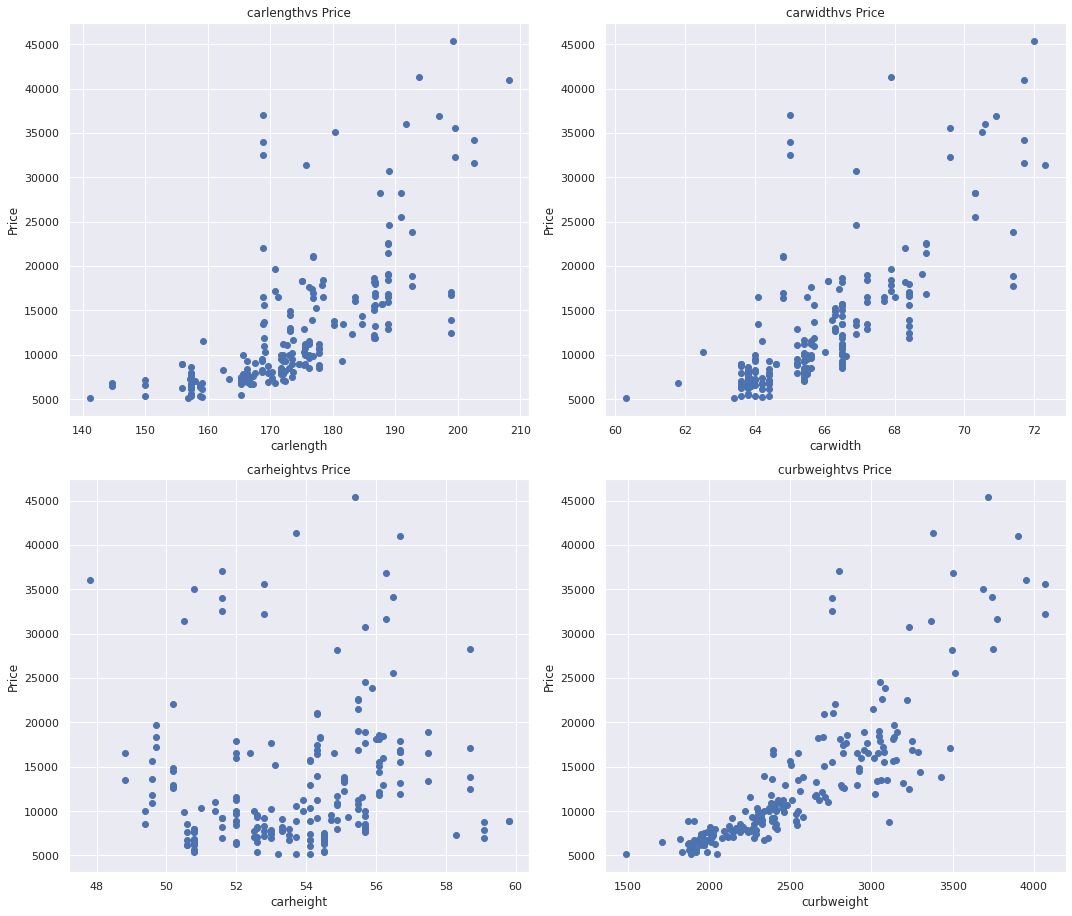

In [11]:
# Scatter car price vs features
def scatter(z,fig):
    plt.subplot(4,2,fig)
    plt.scatter( cars[z], cars['price'])
    plt.title(z+ 'vs Price')
    plt.ylabel('Price')
    plt.xlabel(z)
    

plt.figure(figsize=(15,25))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### The last four graphs above show that carlength, carwidth  and curbweight seems have positive correlation with car price, but carheight don't show any significant positive relation with price.

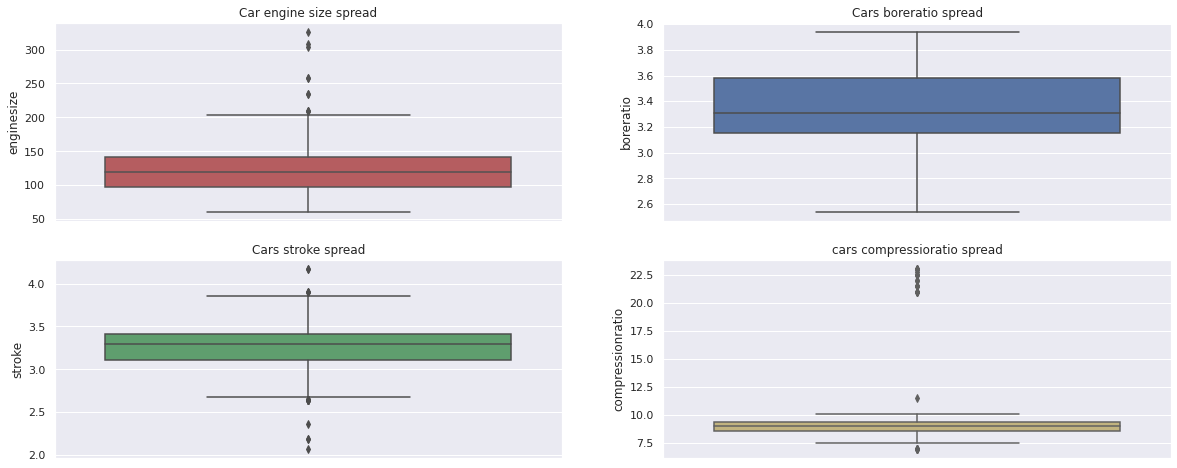

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Car engine size spread')
sns.boxplot(y=cars.enginesize, color = "r")

plt.subplot(2,2,2)
plt.title('Cars boreratio spread')
sns.boxplot(y=cars.boreratio)

plt.subplot(2,2,3)
plt.title('Cars stroke spread')
sns.boxplot(y=cars.stroke, color = "g")

plt.subplot(2,2,4)
plt.title('cars compressioratio spread')
sns.boxplot(y=cars.compressionratio, color = "y")


plt.show()

### The features car enginesize and car stroke have signicant outliers while car compressioratio shows very expressive outliers.

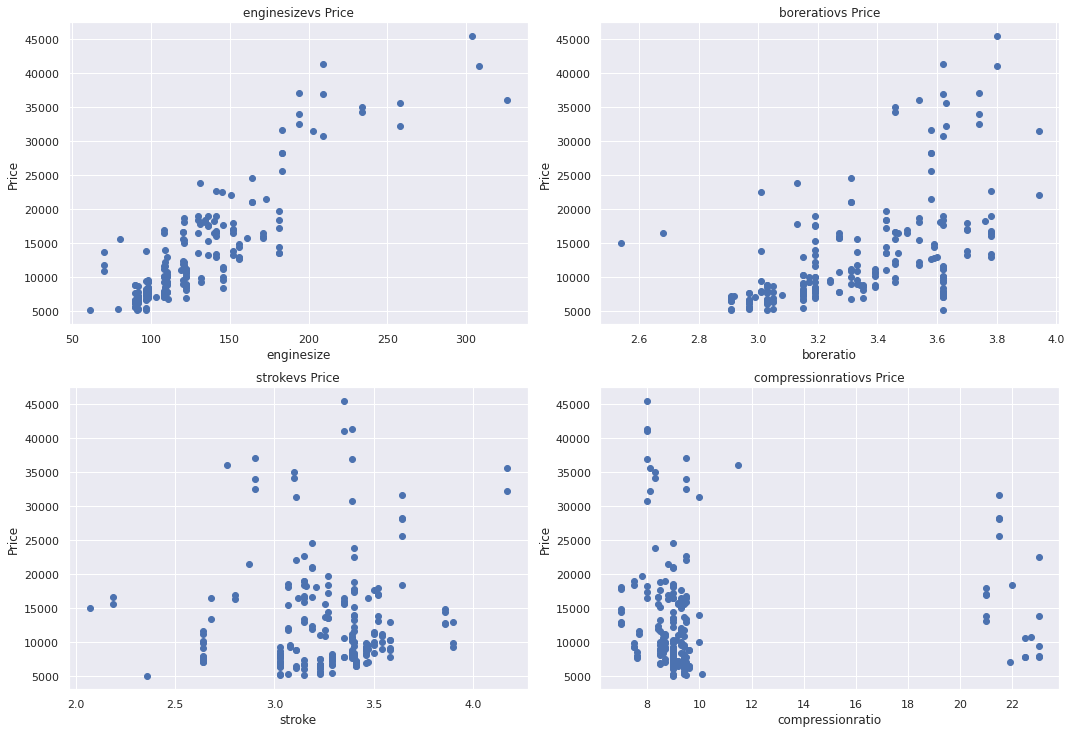

In [13]:
def scatter(z,fig):
    plt.subplot(5,2,fig)
    plt.scatter( cars[z], cars['price'])
    plt.title(z+ 'vs Price')
    plt.ylabel('Price')
    plt.xlabel(z)
   
plt.figure(figsize=(15,25))

scatter('enginesize', 1)
scatter('boreratio', 2)
scatter('stroke', 3)
scatter('compressionratio', 4)

plt.tight_layout()

### The last four graphs above show that 'enginesize' and 'boreratio' have positive correlation with price, but 'stroke' and 'compressioratio' don't show any significant positive relation with price.

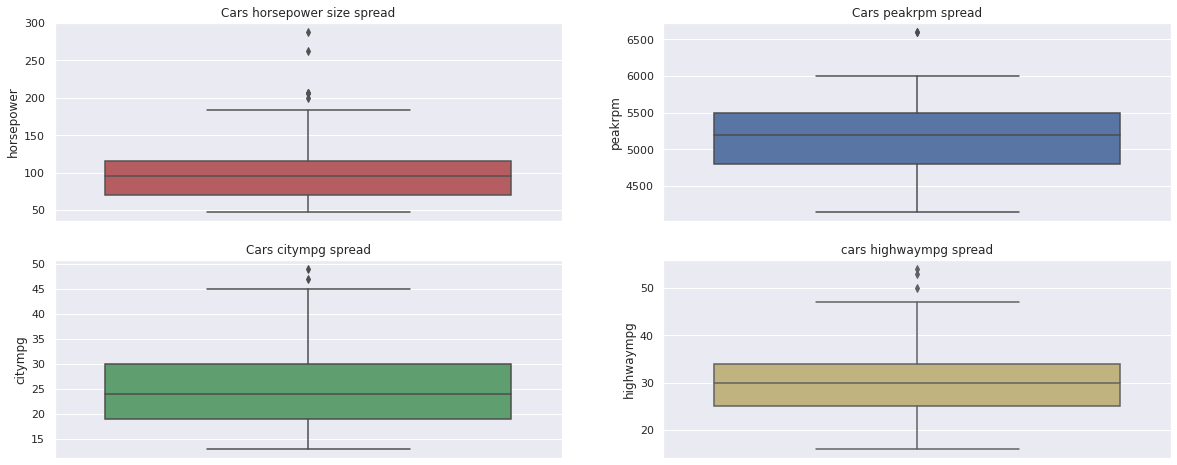

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Cars horsepower size spread')
sns.boxplot(y=cars.horsepower, color = "r")

plt.subplot(2,2,2)
plt.title('Cars peakrpm spread')
sns.boxplot(y=cars.peakrpm)

plt.subplot(2,2,3)
plt.title('Cars citympg spread')
sns.boxplot(y=cars.citympg, color = "g")

plt.subplot(2,2,4)
plt.title('cars highwaympg spread')
sns.boxplot(y=cars.highwaympg, color = "y")


plt.show()

### All graphs above shows some outliers presence being that car 'horsepower' have lot outliers.

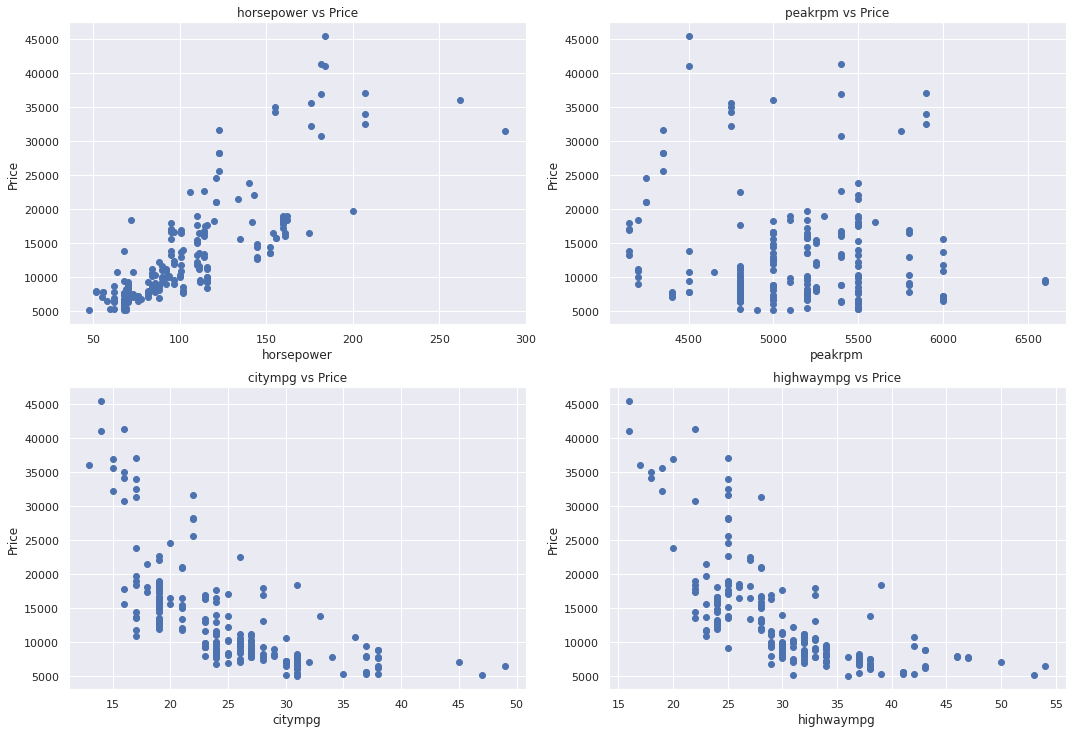

In [15]:
def scatter(z,fig):
    plt.subplot(5,2,fig)
    plt.scatter( cars[z], cars['price'])
    plt.title(z+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(z)
   
plt.figure(figsize=(15,25))

scatter('horsepower', 1)
scatter('peakrpm', 2)
scatter('citympg', 3)
scatter('highwaympg', 4)

plt.tight_layout()

### The last four graphs just 'horsepower' have positive correlation with price. In case 'peakrpm' seems don't have significant positivi corelation with price. Lastly, we have 'citympg' and 'highwaympg' have negative correlation with price.

### **Note:** It is worth mentioning here the definition of city mpg and highway mpg

   * ### City mpg: This number is the average mpg (Mile per galon) for your car in the city. 
   
   * ### Highway mpg: Highway mpg is the average mpg for your car on the highway.

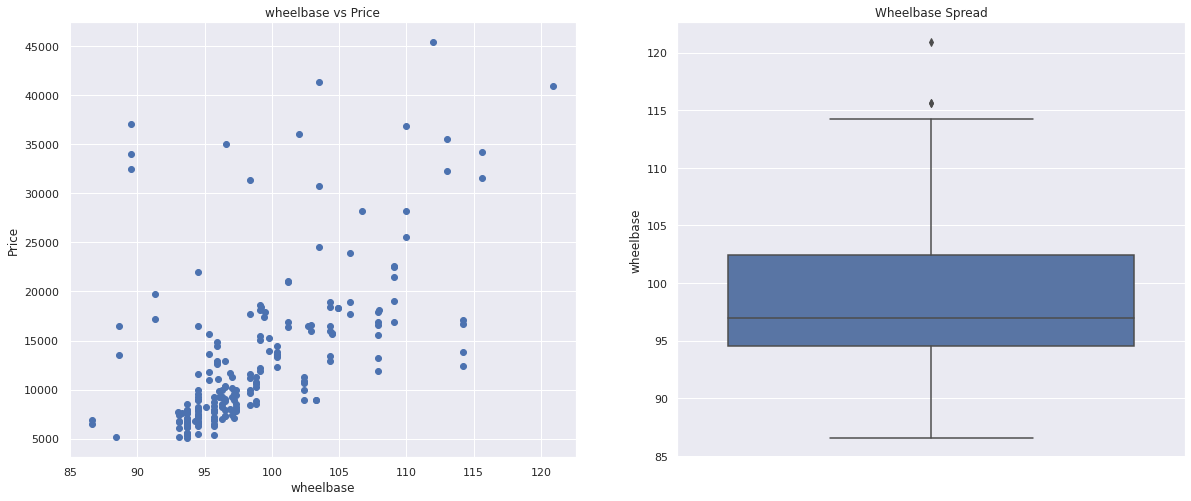

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter( cars['wheelbase'], cars['price'])
plt.title( 'wheelbase vs Price')
plt.ylabel('Price')
plt.xlabel('wheelbase')

plt.subplot(1,2,2)
plt.title('Wheelbase Spread')
sns.boxplot(y=cars.wheelbase)

plt.show()

### The 'wheelbase' show positive correlation with price and don´t show significant outliers.

## 4.2. <a id='basic'>Categorical Data </a> 

### Extracting information from categorical data

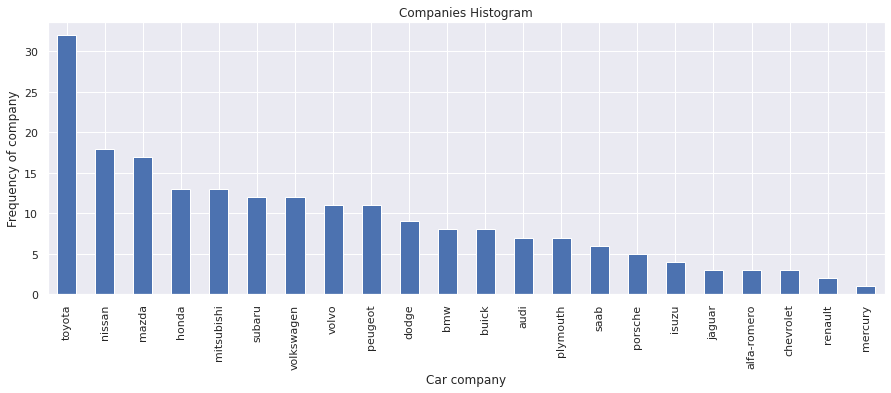

In [17]:
plt.figure(figsize=(15,5))

ex= cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
ex.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()

### The toyota company is more often in dataset

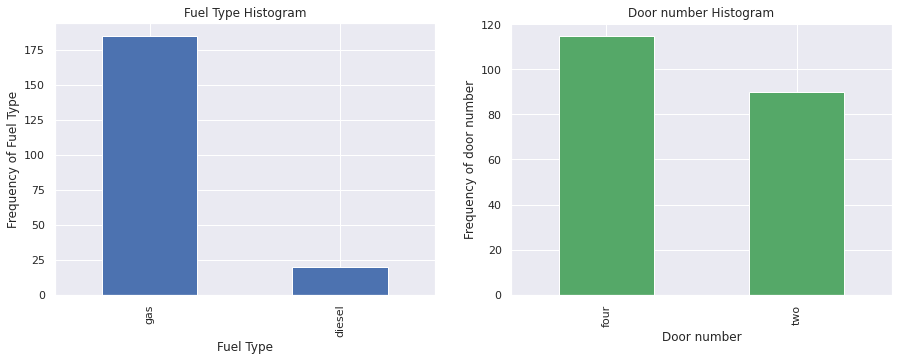

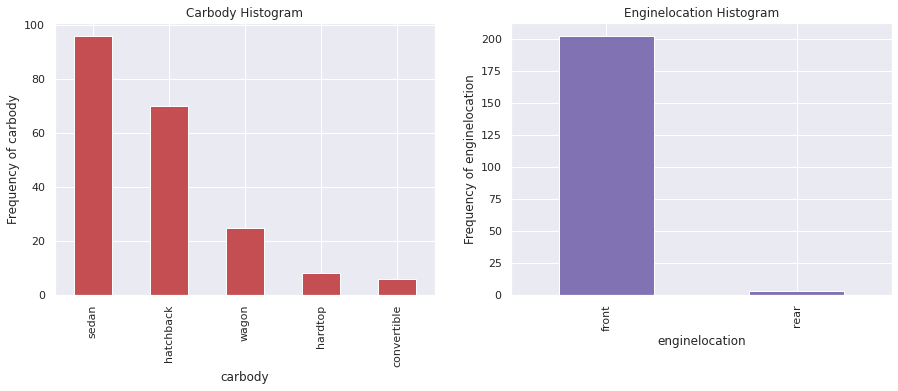

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ex1= cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
ex1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

plt.subplot(1,2,2)
ex1= cars.doornumber.value_counts().plot(kind='bar', color = 'g')
plt.title('Door number Histogram')
ex1.set(xlabel = 'Door number', ylabel='Frequency of door number')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ex1= cars.carbody.value_counts().plot(kind='bar', color = 'r')
plt.title('Carbody Histogram')
ex1.set(xlabel = 'carbody', ylabel='Frequency of carbody')

plt.subplot(1,2,2)
ex1= cars.enginelocation.value_counts().plot(kind='bar', color = 'm')
plt.title('Enginelocation Histogram')
ex1.set(xlabel = 'enginelocation', ylabel='Frequency of enginelocation')

plt.show()

### Based on the last four graphs above we see that gasoline predominates when compared to dissel. In case door number the system of four doors it's more common than two doors although both systems are almost equivalent in amount. Sedan is the preferred in carbody and the front engine location it is almost all cases.

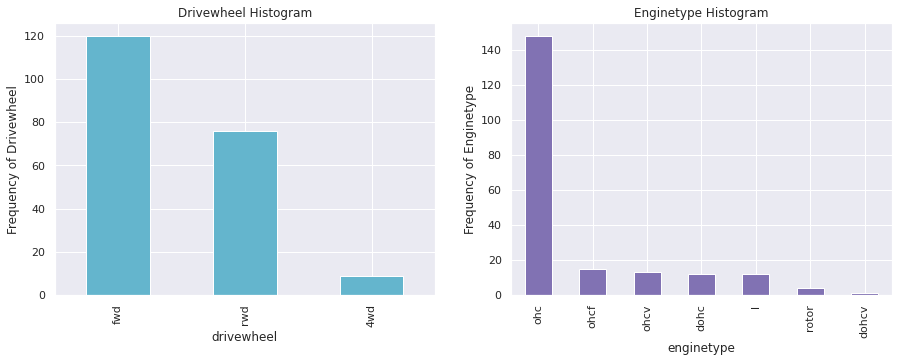

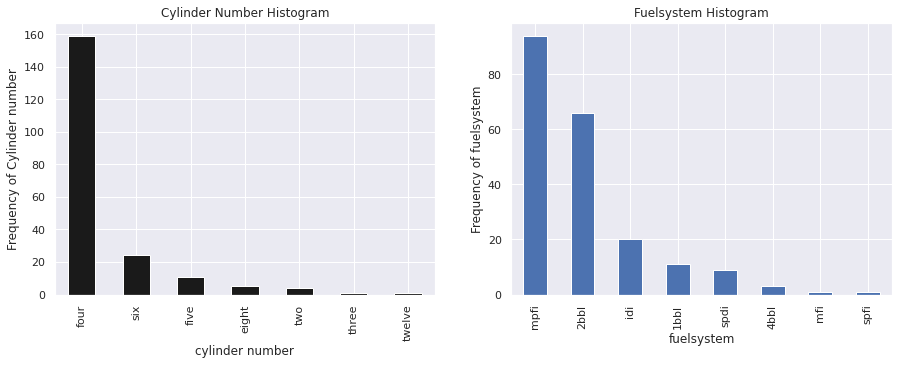

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ex1= cars.drivewheel.value_counts().plot(kind='bar', color = 'c')
plt.title('Drivewheel Histogram')
ex1.set(xlabel = 'drivewheel', ylabel='Frequency of Drivewheel')

plt.subplot(1,2,2)
ex1= cars.enginetype.value_counts().plot(kind='bar', color = 'm')
plt.title('Enginetype Histogram')
ex1.set(xlabel = 'enginetype', ylabel='Frequency of Enginetype')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ex1= cars.cylindernumber.value_counts().plot(kind='bar', color = 'k')
plt.title('Cylinder Number Histogram')
ex1.set(xlabel = 'cylinder number', ylabel='Frequency of Cylinder number')

plt.subplot(1,2,2)
ex1= cars.fuelsystem.value_counts().plot(kind='bar')
plt.title('Fuelsystem Histogram')
ex1.set(xlabel = 'fuelsystem', ylabel='Frequency of fuelsystem')

plt.show()

### Based on the last four graphs above the fwd (front-wheel drive) is the preferred in 'drivewheel'. The ohc (over head cam) engine type predominates over all others like the engine that have four cylinder predominates over all others. The mpfi (Multi-point injection) is more often fuel system.

### It is usual to combine city mpg with highway mpg, so we can create a new feature

In [20]:
# Combined mpg feature
cars['combined_mpg'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

### This relation can be found into: [https://www.meridianhonda.com/blog/whats-difference-city-highway-mpg/](https://www.meridianhonda.com/blog/whats-difference-city-highway-mpg/)

### We can too derived new feature call 'carquality' that split car prices of companies

In [21]:
#Split the Car Companies based on prices of each Company.

temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsquality'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,combined_mpg,carsquality
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium


## 4.3. <a id='basic'>Machine learning data preprocessing  </a> 

### Get rid useless columns

In [22]:
# Selecting and drop useless columns
car_new = cars.drop(columns = ['CompanyName','car_ID','symboling','doornumber', 'enginelocation', 'carheight', 'stroke','compressionratio', 'peakrpm'], axis = 1)

In [23]:
car_new.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,combined_mpg,carsquality
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0,23.70,Medium
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0,23.70,Medium
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,22.15,Medium
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0,26.70,Medium
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0,19.80,Medium


In [24]:
# Checking the new dataset information
car_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   fueltype        205 non-null    object  
 1   aspiration      205 non-null    object  
 2   carbody         205 non-null    object  
 3   drivewheel      205 non-null    object  
 4   wheelbase       205 non-null    float64 
 5   carlength       205 non-null    float64 
 6   carwidth        205 non-null    float64 
 7   curbweight      205 non-null    int64   
 8   enginetype      205 non-null    object  
 9   cylindernumber  205 non-null    object  
 10  enginesize      205 non-null    int64   
 11  fuelsystem      205 non-null    object  
 12  boreratio       205 non-null    float64 
 13  horsepower      205 non-null    int64   
 14  citympg         205 non-null    int64   
 15  highwaympg      205 non-null    int64   
 16  price           205 non-null    float64 
 17  combined_mpg    

### Enconder categorical data

In [25]:
# Import encoder library
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing


le = LabelEncoder() 
le1=  LabelEncoder()
car_new['fueltype'] =le.fit_transform(car_new['fueltype'])
car_new['aspiration']=le.fit_transform(car_new['aspiration'])

car_new['carbody']=le.fit_transform(car_new['carbody'])
car_new['drivewheel']=le.fit_transform(car_new['drivewheel'])

car_new['enginetype']=le.fit_transform(car_new['enginetype'])
car_new['cylindernumber']=le.fit_transform(car_new['cylindernumber'])

car_new['fuelsystem']=le.fit_transform(car_new['fuelsystem'])
car_new['carsquality']=le.fit_transform(car_new['carsquality'])

In [26]:
car_new.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,combined_mpg,carsquality
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,13495.0,23.70,2
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,16500.0,23.70,2
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,26,16500.0,22.15,2
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,30,13950.0,26.70,2
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,22,17450.0,19.80,2


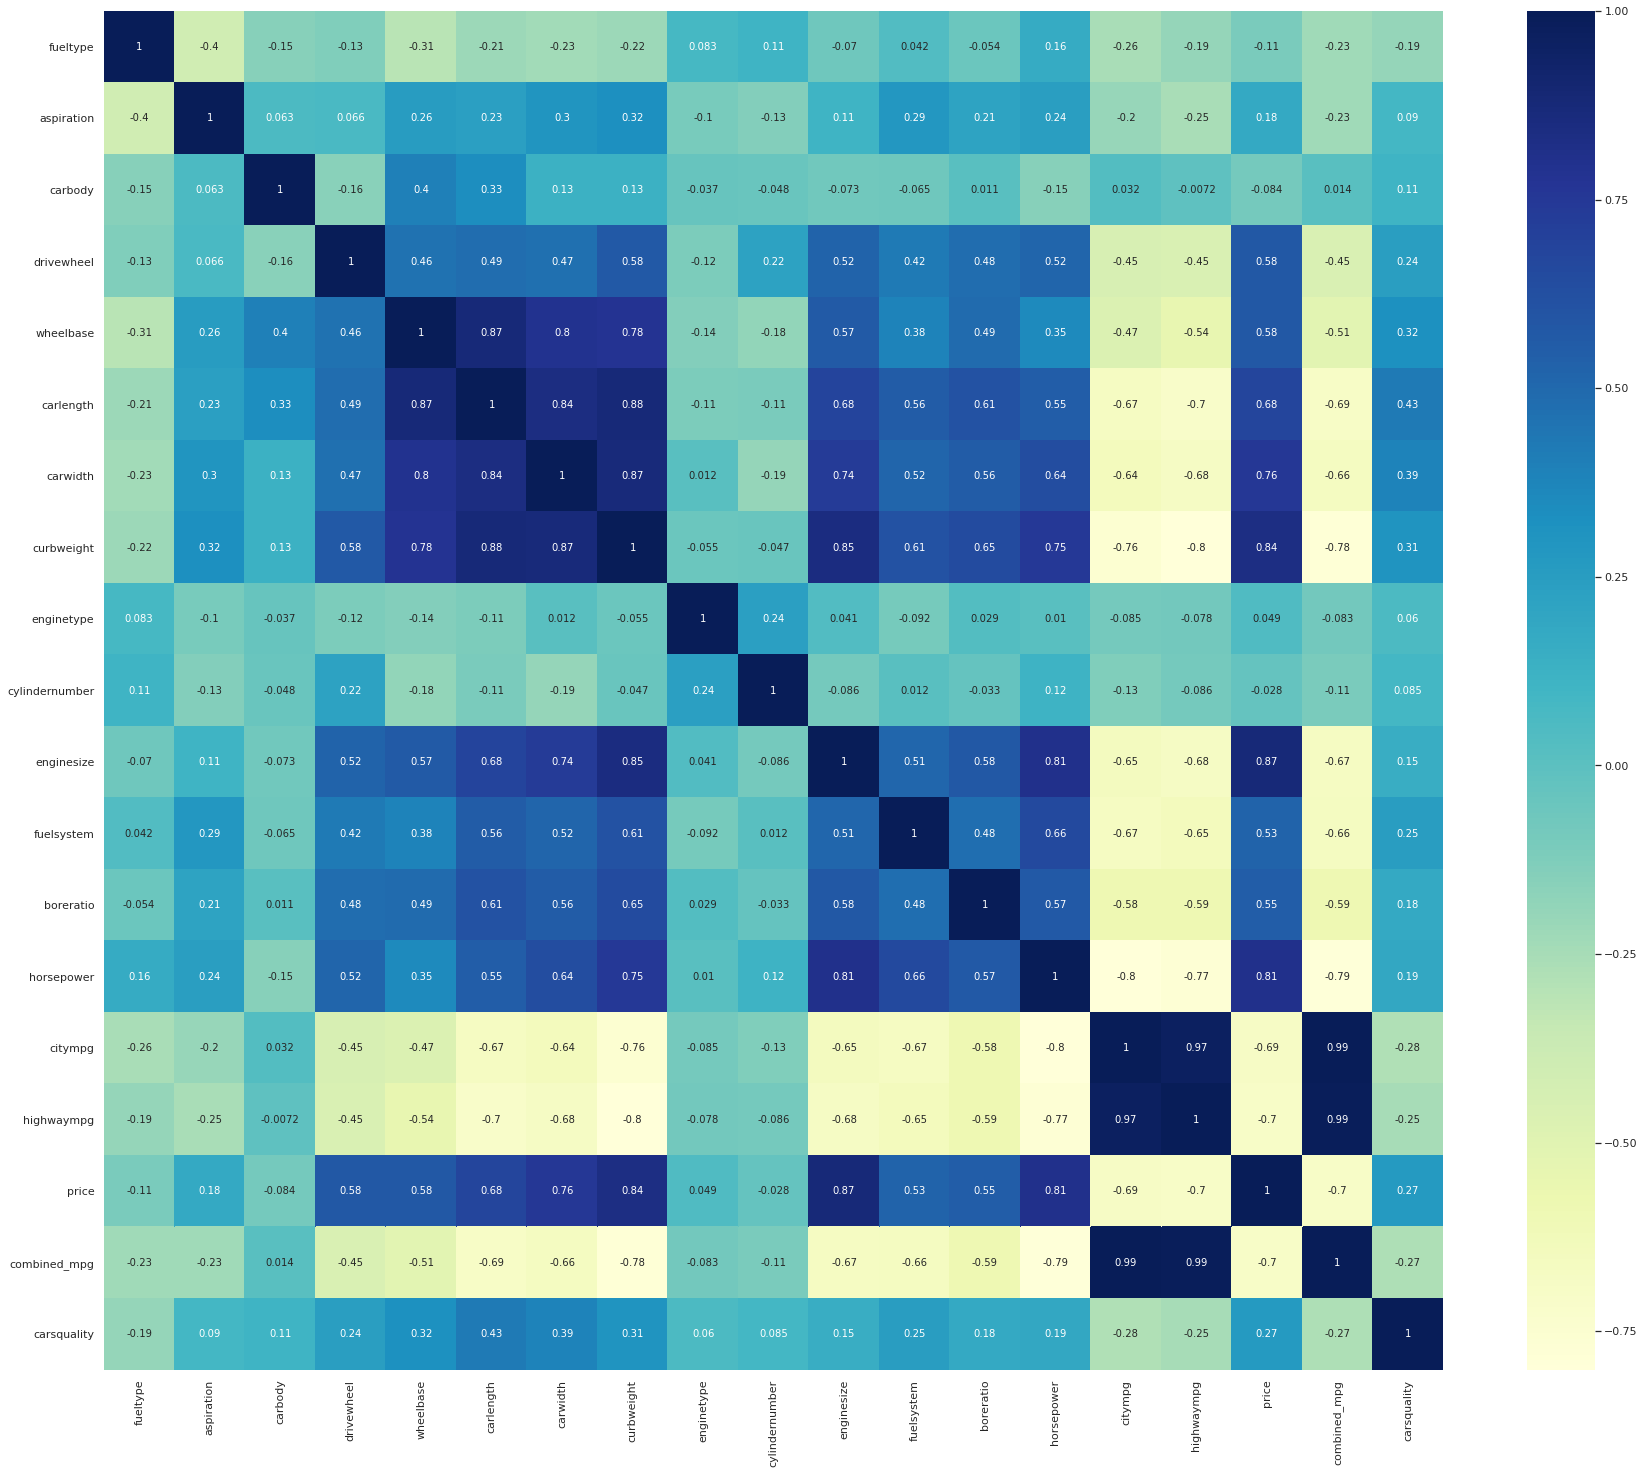

In [27]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(car_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

###  The car prices have most positive correlation with features 'carlength', 'carwidth', 'curbweight',  'enginesize',  'horsepower' and most negative correlation with features 'citympg', 'highwaympg',  'combined_mpg'. We can infer that feature 'enginesize' has the highest positive correlation of all, while 'highwaympg' and 'combined_mpg' have the highest negative correlation of all.

# 5. <a id='basic'>  Car price forecasting based on features using Random Florest algorithm </a> 

### We will using a machine learning algorithm to forecast car prices based in features with  highest positive correlation and highest negative correlation. To perform this task we will use Random Florest algorithm.

## 5.1 <a id='basic'> Price forecasting based in car width feature</a> 

In [28]:
# Split new_car['carwidth'] like feature and new_car['price'] target 
x = np.array(car_new['carwidth']).reshape(-1, 1)
y = np.array(car_new['price']).reshape(-1, 1)

In [29]:
# Import Random Florest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x, y)
y_pred= rf_reg.predict(x)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x,y), "%")

Accuracy of random forest regressor model:  88.84742841180686 %


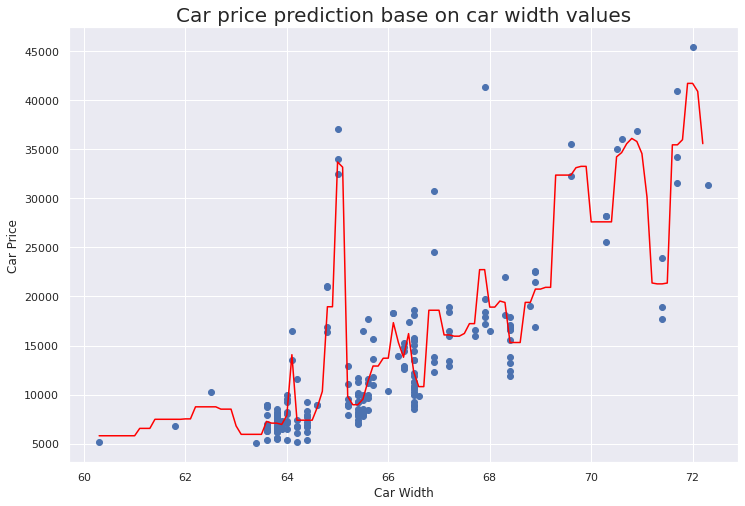

In [30]:
# Plotting forecasting price 
x_ = np.arange(min(x), max(x), 0.1).reshape(-1,1)
predicted = rf_reg.predict(x_)

plt.figure( figsize = (12,8))
plt.scatter(x, y)
plt.plot(x_, predicted, color = 'red')
plt.title("Car price forecasting based on car width values", size = '20')
plt.xlabel('Car Width')
plt.ylabel('Car Price')
plt.show()

## 5.2 <a id='basic'> Price forecasting based in car length feature</a> 

In [31]:
x1 = np.array(car_new['carlength']).reshape(-1, 1)
y1 = np.array(car_new['price']).reshape(-1, 1)

In [32]:
srf_reg = RandomForestRegressor()
srf_reg.fit(x1, y1)
y_pred1= srf_reg.predict(x1)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*srf_reg.score(x1,y1), "%")

Accuracy of random forest regressor model:  90.54366846633201 %


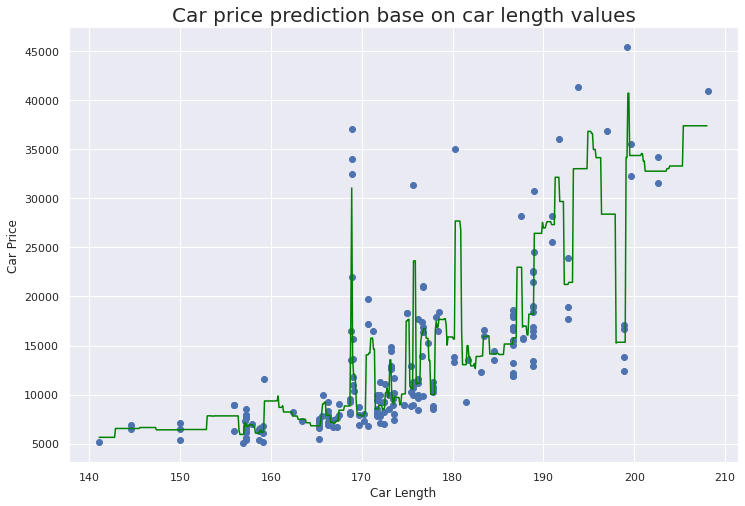

In [33]:
# Plotting forecasting predection
sx_ = np.arange(min(x1), max(x1), 0.1).reshape(-1,1)
predicted1 = srf_reg.predict(sx_)


plt.figure( figsize = (12,8))
plt.scatter(x1, y1)
plt.plot(sx_, predicted1, color = 'green')
plt.title("Car price forecasting based on car length values", size = '20')
plt.xlabel('Car Length'),
plt.ylabel('Car Price')
plt.show()

## 5.3 <a id='basic'> Price forecasting based in car curbweight feature</a> 

In [34]:
x2 = np.array(car_new['curbweight']).reshape(-1, 1)
y2 = np.array(car_new['price']).reshape(-1, 1)

In [35]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x2, y2)
y_pred2= rf_reg.predict(x2)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x2,y2), "%")

Accuracy of random forest regressor model:  94.83860930965167 %


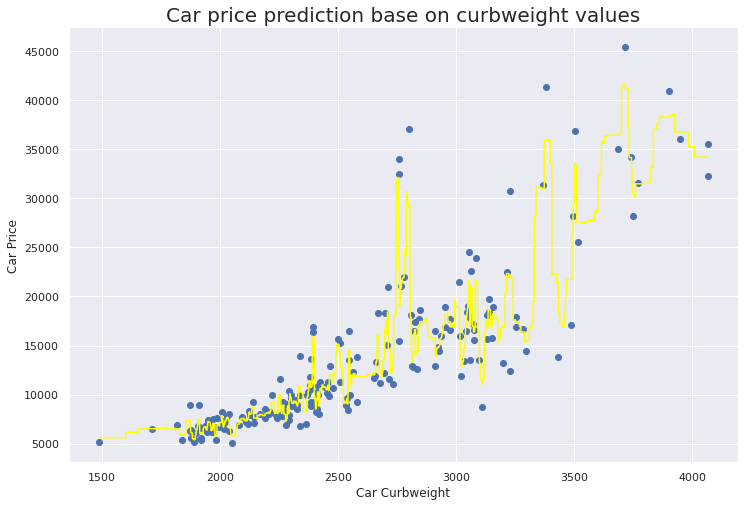

In [36]:
# Plotting forecasting prediction
x_ = np.arange(min(x2), max(x2), 0.1).reshape(-1,1)
predicted2 = rf_reg.predict(x_)


plt.figure( figsize = (12,8))
plt.scatter(x2, y2)
plt.plot(x_, predicted2, color = 'yellow')
plt.title("Car price forecasting based on curbweight values", size = '20') 
plt.xlabel('Car Curbweight'),
plt.ylabel('Car Price')
plt.show()

## 5.4 <a id='basic'> Price forecasting based in car enginesize feature</a> 

In [37]:
x3 = np.array(car_new['enginesize']).reshape(-1, 1)
y3 = np.array(car_new['price']).reshape(-1, 1)

In [38]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x3, y3)
y_pred3= rf_reg.predict(x3)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x3,y3), "%")

Accuracy of random forest regressor model:  93.72483794372579 %


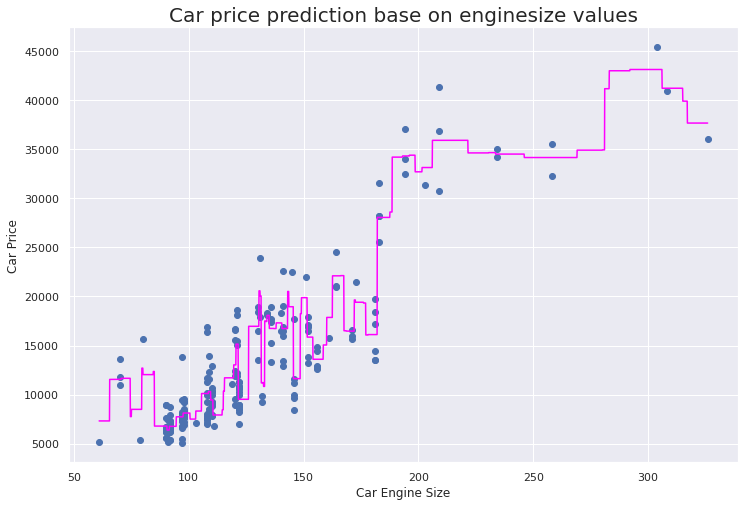

In [39]:
# Plotting forecasting prediction
x_ = np.arange(min(x3), max(x3), 0.1).reshape(-1,1)
predicted3 = rf_reg.predict(x_)


plt.figure( figsize = (12,8))
plt.scatter(x3, y3)
plt.plot(x_, predicted3, color = 'magenta')
plt.title("Car price forecasting  based on enginesize values", size = '20') 
plt.xlabel('Car Engine Size'),
plt.ylabel('Car Price')
plt.show()

## 5.5 <a id='basic'> Price forecasting based in car horsepower feature</a> 

In [40]:
x4 = np.array(car_new['horsepower']).reshape(-1, 1)
y4 = np.array(car_new['price']).reshape(-1, 1)

In [41]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x4, y4)
y_pred4= rf_reg.predict(x4)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x4,y4), "%")

Accuracy of random forest regressor model:  94.18859049159691 %


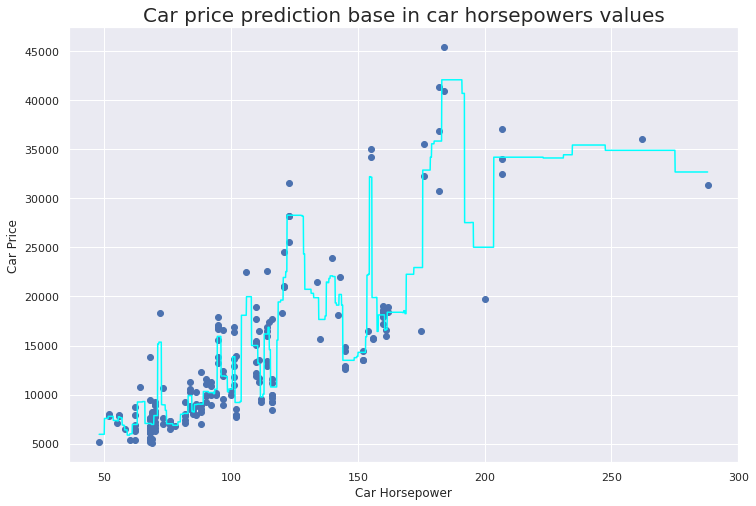

In [42]:
# Plotting forecasting prediction
x_ = np.arange(min(x4), max(x4), 0.1).reshape(-1,1)
predicted4 = rf_reg.predict(x_)


plt.figure( figsize = (12,8))
plt.scatter(x4, y4)
plt.plot(x_, predicted4, color = 'cyan')
plt.title("Car price forecasting based in car horsepowers values", size = '20') 
plt.xlabel('Car Horsepower'),
plt.ylabel('Car Price')
plt.show()

## 5.6 <a id='basic'> Price forecasting based in car curbweight feature</a> 

In [43]:
x5 = np.array(car_new['citympg']).reshape(-1, 1)
y5 = np.array(car_new['price']).reshape(-1, 1)

In [44]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x5, y5)
y_pred5= rf_reg.predict(x5)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x5,y5), "%")

Accuracy of random forest regressor model:  78.22972770107262 %


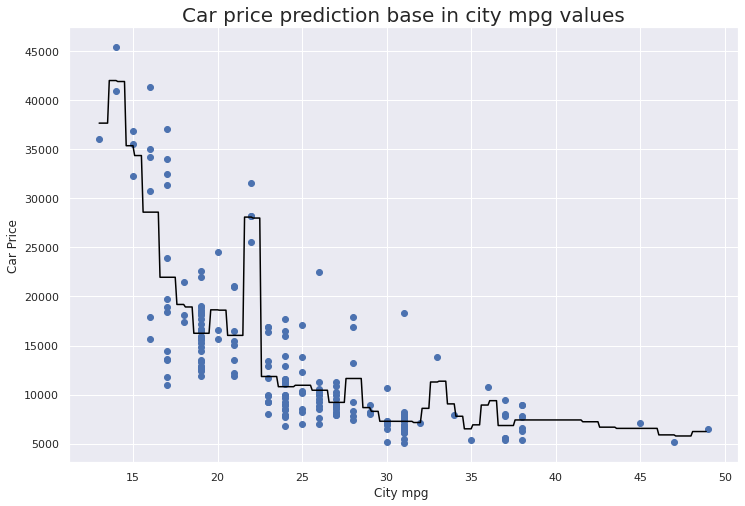

In [45]:
# Plotting forecasting prediction
x_ = np.arange(min(x5), max(x5), 0.1).reshape(-1,1)
predicted5 = rf_reg.predict(x_)


plt.figure( figsize = (12,8))
plt.scatter(x5, y5)
plt.plot(x_, predicted5, color = 'black')
plt.title("Car price forecasting based in city mpg values", size = '20') 
plt.xlabel('City mpg '),
plt.ylabel('Car Price')
plt.show()

## 5.7 <a id='basic'> Price forecasting based in combined mpg feature</a> 

In [46]:
x6 = np.array(car_new['combined_mpg']).reshape(-1, 1)
y6 = np.array(car_new['price']).reshape(-1, 1)

In [47]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x6, y6)
y_pred6= rf_reg.predict(x6)
print(Fore.BLUE + "Accuracy of random forest regressor model: ",100*rf_reg.score(x6,y6), "%")

Accuracy of random forest regressor model:  91.74108152406653 %


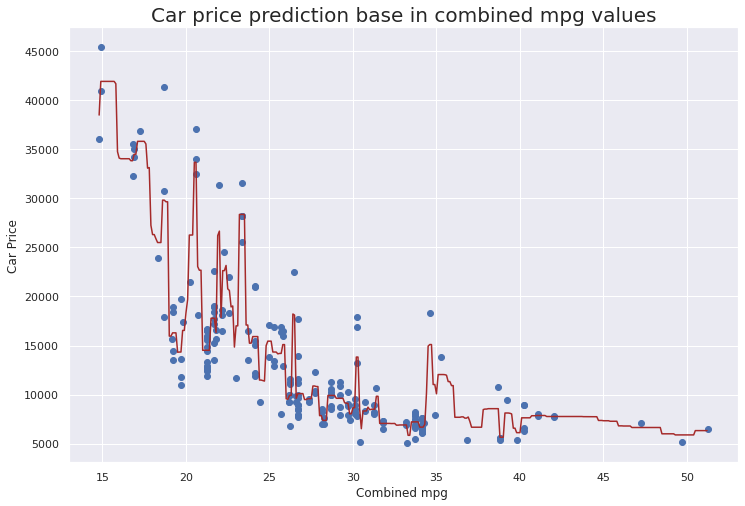

In [48]:
# Plotting forecasting prediction
x_ = np.arange(min(x6), max(x6), 0.1).reshape(-1,1)
predicted6 = rf_reg.predict(x_)


plt.figure( figsize = (12,8))
plt.scatter(x6, y6)
plt.plot(x_, predicted6, color = 'Brown')
plt.title("Car price forecasting based in combined mpg values", size = '20') 
plt.xlabel('Combined mpg '),
plt.ylabel('Car Price')
plt.show()

# 6 <a id='basic'> Conclusion</a> 

### We aplly Random Florest Regressor to forecasting price car using the features with the highest correlations. In most cases we obtained predictions with accuracy greater than 90%, proving that random forest is a great algorithm for making predictions for our dataset. Once we have new data about cars settings like engine size, horsepower etc we may predict the price with more than 90% of accuracy in most cases.